In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
gen_data = pd.read_csv("df_fuel_ckan.csv")

In [13]:
gen_data.head()

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,...,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc,sd
0,2009-01-01 00:00:00+00:00,8396.0,15038.0,7098.0,273.0,246.0,2506.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,22.7,22.7,1.5,69.8,2009-01-01 00:00:00
1,2009-01-01 00:30:00+00:00,8526.0,15097.0,7086.0,253.0,245.0,2485.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.1,2009-01-01 00:30:00
2,2009-01-01 01:00:00+00:00,8492.0,15083.0,7073.0,228.0,246.0,2450.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.4,70.2,2009-01-01 01:00:00
3,2009-01-01 01:30:00+00:00,8335.0,15015.0,7063.0,212.0,246.0,2420.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.1,2009-01-01 01:30:00
4,2009-01-01 02:00:00+00:00,8304.0,14975.0,7051.0,196.0,246.0,2349.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.3,70.3,2009-01-01 02:00:00


In [7]:
gen_data.columns

Index(['DATETIME', 'GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS',
       'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE', 'GENERATION',
       'CARBON_INTENSITY', 'LOW_CARBON', 'ZERO_CARBON', 'RENEWABLE', 'FOSSIL',
       'GAS_perc', 'COAL_perc', 'NUCLEAR_perc', 'WIND_perc', 'HYDRO_perc',
       'IMPORTS_perc', 'BIOMASS_perc', 'OTHER_perc', 'SOLAR_perc',
       'STORAGE_perc', 'GENERATION_perc', 'LOW_CARBON_perc',
       'ZERO_CARBON_perc', 'RENEWABLE_perc', 'FOSSIL_perc'],
      dtype='object')

In [8]:
len(gen_data)

253323

In [9]:
#wind_data = gen_data['WIND','WIND_perc']

In [10]:
start_date = '2009-01-01 00:00:00'
end_date = '2024-05-18 00:00:00'
interval = pd.Timedelta(minutes=30)

# Create a DataFrame with a column of 30-minute intervals
gen_data["sd"] = pd.DataFrame({'Timestamp': pd.date_range(start=start_date, end=end_date, freq=interval)})

In [12]:
gen_data['DATETIME'] = pd.to_datetime(gen_data['DATETIME'])

In [15]:
gen_data.set_index('DATETIME', inplace=True)


In [19]:
gen_data_yearly = gen_data.resample('Y').mean()


In [20]:
gen_data_yearly.reset_index(inplace=True)

In [27]:
gen_data_yearly.tail()

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
10,2019-12-31 00:00:00+00:00,13077.494007,677.747260,6023.598801,6670.850228,408.025913,2865.580365,1963.806735,88.506450,1316.236130,...,8.850656,6.035742,0.272363,3.701279,0.513430,100.0,50.282717,44.247146,25.474424,40.080046
11,2020-12-31 00:00:00+00:00,10826.044684,498.857923,5396.951104,7775.634620,490.713684,2621.101378,2046.927937,167.402607,1372.586976,...,8.462489,6.686270,0.543090,4.177351,0.471351,100.0,55.376252,48.690266,30.860303,35.145862
12,2021-12-31 00:00:00+00:00,12243.855137,567.816952,4956.270091,7101.145434,369.545263,3350.258961,2170.958333,209.178653,1319.083390,...,10.643682,6.796199,0.632957,3.760913,0.557169,100.0,49.493653,42.697968,26.906650,38.670885
13,2022-12-31 00:00:00+00:00,12699.494178,487.850856,5105.920034,8818.736358,379.982934,1856.937386,1708.912728,291.635731,1452.461587,...,5.543664,5.189777,0.868453,4.124406,0.598647,100.0,53.274132,48.084589,32.176358,39.714737
14,2023-12-31 00:00:00+00:00,10412.182808,243.317002,4307.468667,8903.033928,360.475250,4362.052285,1424.035574,264.397265,1480.874414,...,13.985897,4.461160,0.806836,4.419205,0.582251,100.0,51.767692,47.306887,33.308469,32.857071


In [25]:
gen_data_yearly.describe()

,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,STORAGE,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000
mean,12526.618571,6274.472275,6577.603048,4447.023450,393.630938,2234.856058,760.432351,462.441736,808.633142,286.063712,...,6.852329,2.361500,1.375096,2.285925,0.728786,100.0,38.839168,36.477768,16.888933,52.204094
std,2686.675863,5844.164467,1125.299049,2931.648428,60.726007,972.568487,944.040810,550.223701,614.589600,70.186715,...,3.163571,2.953458,1.648346,1.772717,0.147986,0.0,12.207693,9.714711,11.110615,14.829223
min,9148.179795,243.317002,4307.468667,474.582078,244.099543,763.071518,0.000000,0.000000,0.000000,169.658811,...,2.236958,0.000000,0.000000,0.000000,0.471351,100.0,20.006752,20.006752,2.040862,32.857071
25%,10150.198510,622.782106,5710.274953,2104.026923,367.710160,1710.208248,0.000000,85.102568,118.997574,216.355663,...,5.029178,0.000000,0.263710,0.309110,0.590449,100.0,28.294479,28.294479,7.067108,39.897392
50%,12699.494178,3190.435679,6923.765011,3616.394007,384.709187,2310.692680,0.000000,238.124886,1152.725638,312.994521,...,6.985627,0.000000,0.639885,3.123298,0.793271,100.0,37.479742,37.479742,14.482969,49.881472
75%,14048.246850,11510.457306,7492.257420,6885.997831,434.917209,2657.495776,1773.518122,646.408333,1317.659760,328.607127,...,8.227138,5.385947,1.841213,3.731096,0.814869,100.0,49.888185,43.772471,26.190537,64.846533
max,17934.119235,15616.537853,7604.859631,8903.033928,490.713684,4362.052285,2170.958333,1616.284324,1480.874414,412.875799,...,13.985897,6.796199,4.800968,4.419205,0.982688,100.0,55.376252,48.690266,33.308469,76.777825


In [ ]:
#gen_data_yearly.rename(columns={'value': 'yearly_value'}, inplace=True)


In [28]:
gen_data_monthly = gen_data.resample('M').mean()

In [30]:
gen_data_monthly.head()

,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,STORAGE,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
DATETIME,,,,,,,,,,,,,,,,,,,,,
2009-01-31 00:00:00+00:00,15300.684812,20732.696237,5795.172043,579.636425,545.055108,592.883737,0.0,0.0,0.0,458.477151,...,1.429435,0.0,0.0,0.0,0.934879,100.0,16.062030,16.062030,2.586156,81.572581
2009-02-28 00:00:00+00:00,14621.982143,18764.712054,8063.098958,420.331101,403.909970,619.057292,0.0,0.0,0.0,502.444940,...,1.479390,0.0,0.0,0.0,1.046354,100.0,20.927083,20.927083,1.924479,76.548884
2009-03-31 00:00:00+00:00,15388.463710,13401.549731,8524.576613,642.223118,579.264113,689.950941,0.0,0.0,0.0,421.073925,...,1.848656,0.0,0.0,0.0,0.956452,100.0,25.094019,25.094019,3.120833,72.101210
2009-04-30 00:00:00+00:00,15394.306944,9233.789583,8385.179167,440.309028,387.883333,1318.450694,0.0,0.0,0.0,305.477778,...,3.884028,0.0,0.0,0.0,0.766389,100.0,26.559097,26.559097,2.313681,68.789028
2009-05-31 00:00:00+00:00,15577.457661,8480.329301,6826.915323,546.131048,308.916667,1747.625000,0.0,0.0,0.0,385.244624,...,5.305914,0.0,0.0,0.0,1.018750,100.0,23.267473,23.267473,2.483535,70.406384


In [31]:
gen_data_weekly = gen_data.resample('W').mean()

In [32]:
gen_data_weekly.head()

,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,STORAGE,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
DATETIME,,,,,,,,,,,,,,,,,,,,,
2009-01-04 00:00:00+00:00,14239.244792,18126.661458,6162.442708,140.453125,331.713542,841.703125,0.0,0.0,0.0,433.125000,...,2.133854,0.0,0.0,0.0,0.945312,100.0,16.828646,16.828646,1.165104,80.093229
2009-01-11 00:00:00+00:00,17349.642857,22053.258929,5360.714286,611.273810,418.738095,153.008929,0.0,0.0,0.0,490.630952,...,0.288095,0.0,0.0,0.0,0.963095,100.0,14.023214,14.023214,2.288393,84.724702
2009-01-18 00:00:00+00:00,15055.238095,20644.687500,5587.830357,754.264881,705.991071,541.351190,0.0,0.0,0.0,445.136905,...,1.357143,0.0,0.0,0.0,0.905357,100.0,16.434524,16.434524,3.392857,81.298214
2009-01-25 00:00:00+00:00,14912.931548,20090.964286,5943.806548,578.636905,632.702381,972.202381,0.0,0.0,0.0,442.238095,...,2.326786,0.0,0.0,0.0,0.908929,100.0,16.736607,16.736607,2.805357,80.030060
2009-02-01 00:00:00+00:00,14084.288690,21160.574405,6278.157738,642.616071,541.907738,758.910714,0.0,0.0,0.0,485.005952,...,1.835714,0.0,0.0,0.0,0.998512,100.0,17.314881,17.314881,2.736607,79.848810


In [43]:
gen_data_weekly.reset_index(inplace=True)

In [44]:


def plot_graph_for_year(data, x_col, y_col, year):
    """
    Plot a graph for a particular year using seaborn.

    Parameters:
        - data (pandas DataFrame): The data containing the year and other columns.
        - x_col (str): The column name for the x-axis values.
        - y_col (str): The column name for the y-axis values.
        - year (int): The desired year to plot.

    Returns:
        None (displays the plot).
    """
    # Filter the data for the specified year
    data_year = data[data[x_col].dt.year == year]

    # Set seaborn style
    sns.set(style='darkgrid')

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot the graph
    sns.lineplot(x=data_year[x_col], y=data_year[y_col], ax=ax)

    # Set plot title and axis labels
    plt.title(f'Graph for Year {year}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Display the plot
    plt.show()


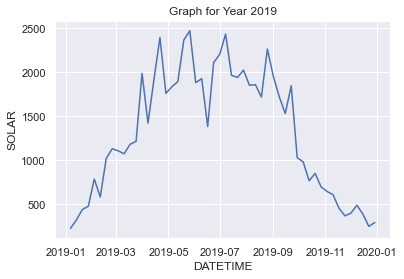

In [47]:
plot_graph_for_year(gen_data_weekly,"DATETIME",'SOLAR',2019)